# after_scale

In [1]:
import pandas as pd

from plotnine import ggplot, aes, after_scale, geom_bar, theme_classic

### after_scale

The bars in `geom_bar` have two aesthetics that control the coloring;
`fill` for the interior and `color` for the boundary/edge. Using
`after_scale` we can create a matching combination of these two.

Start off with a mapping to the `color`.

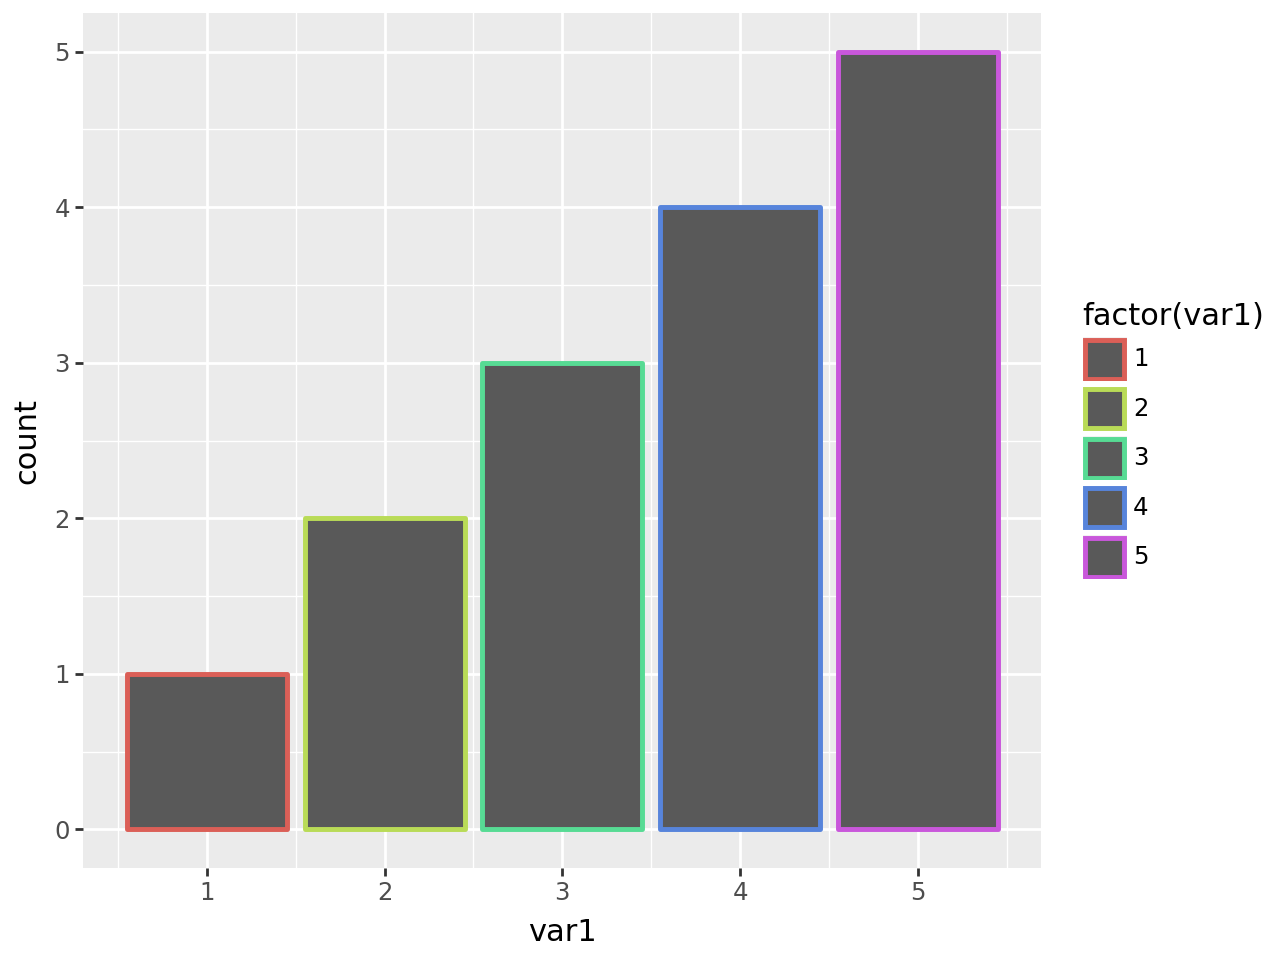

In [2]:
df = pd.DataFrame({"var1": [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]})

(
    ggplot(df, aes("var1", color="factor(var1)"))
    + geom_bar(size=1)
)

We can match the `color` with the `fill`.

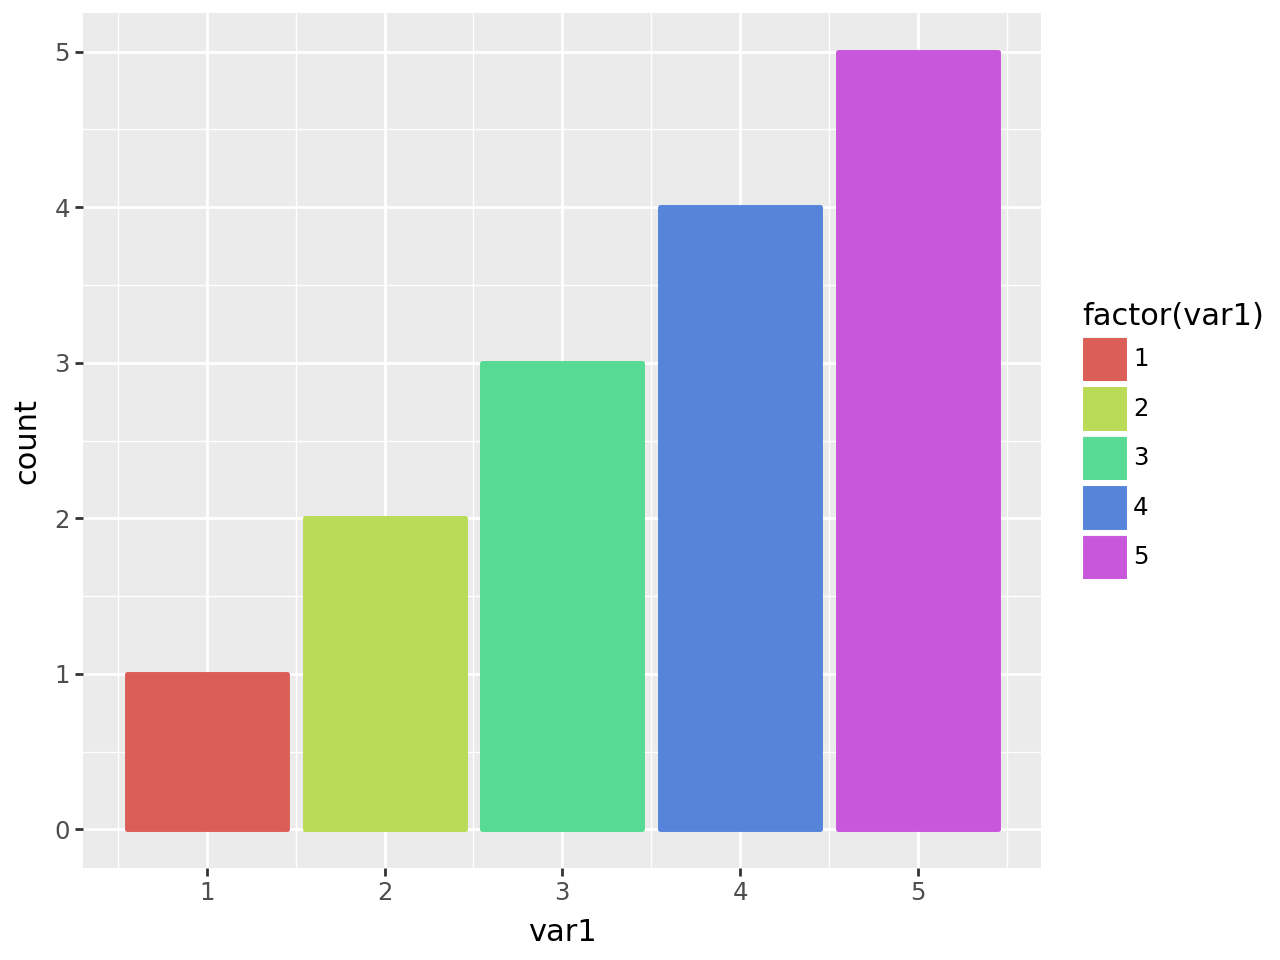

In [3]:
(
    ggplot(df, aes("var1", color="factor(var1)"))
    + geom_bar(aes(fill=after_scale("color")), size=1)
)

As `after_scale` takes an expression, for the `fill` aesthetic we can
modify the `color` by adding to it an alpha channel i.e. `'#AABBCC'` to
`'#AABBCC66'`.

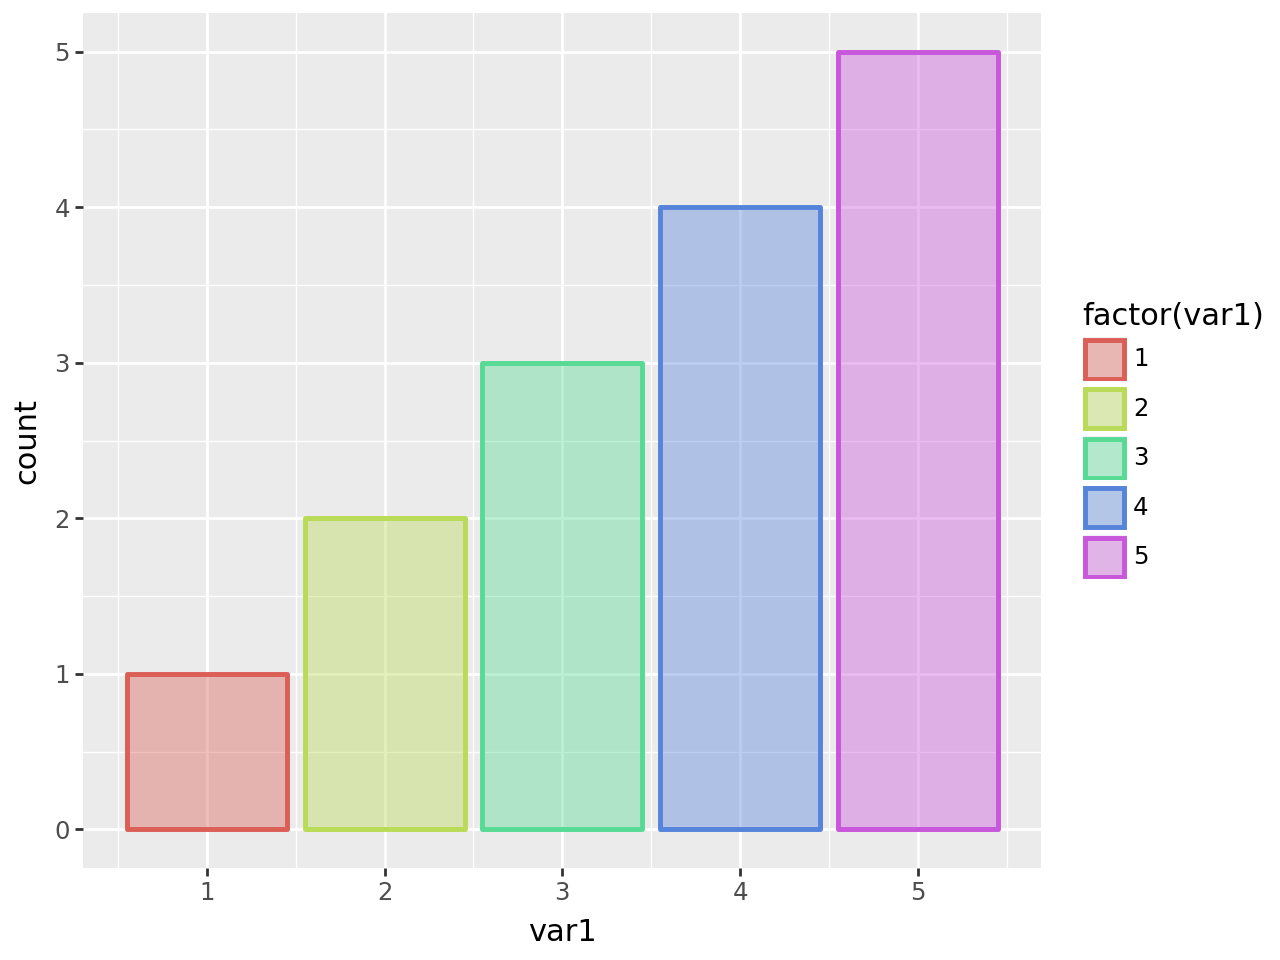

In [4]:
(
    ggplot(df, aes("var1", color="factor(var1)"))
    + geom_bar(aes(fill=after_scale('color + "66"')), size=1)
)

We rely on the fact that you can append a string to all elements of a
pandas series

    pd.Series(['#AABBCC', '#112233']) + '66' == pd.Series(['#AABBCC66', '#11223366'])

With a fitting theme.

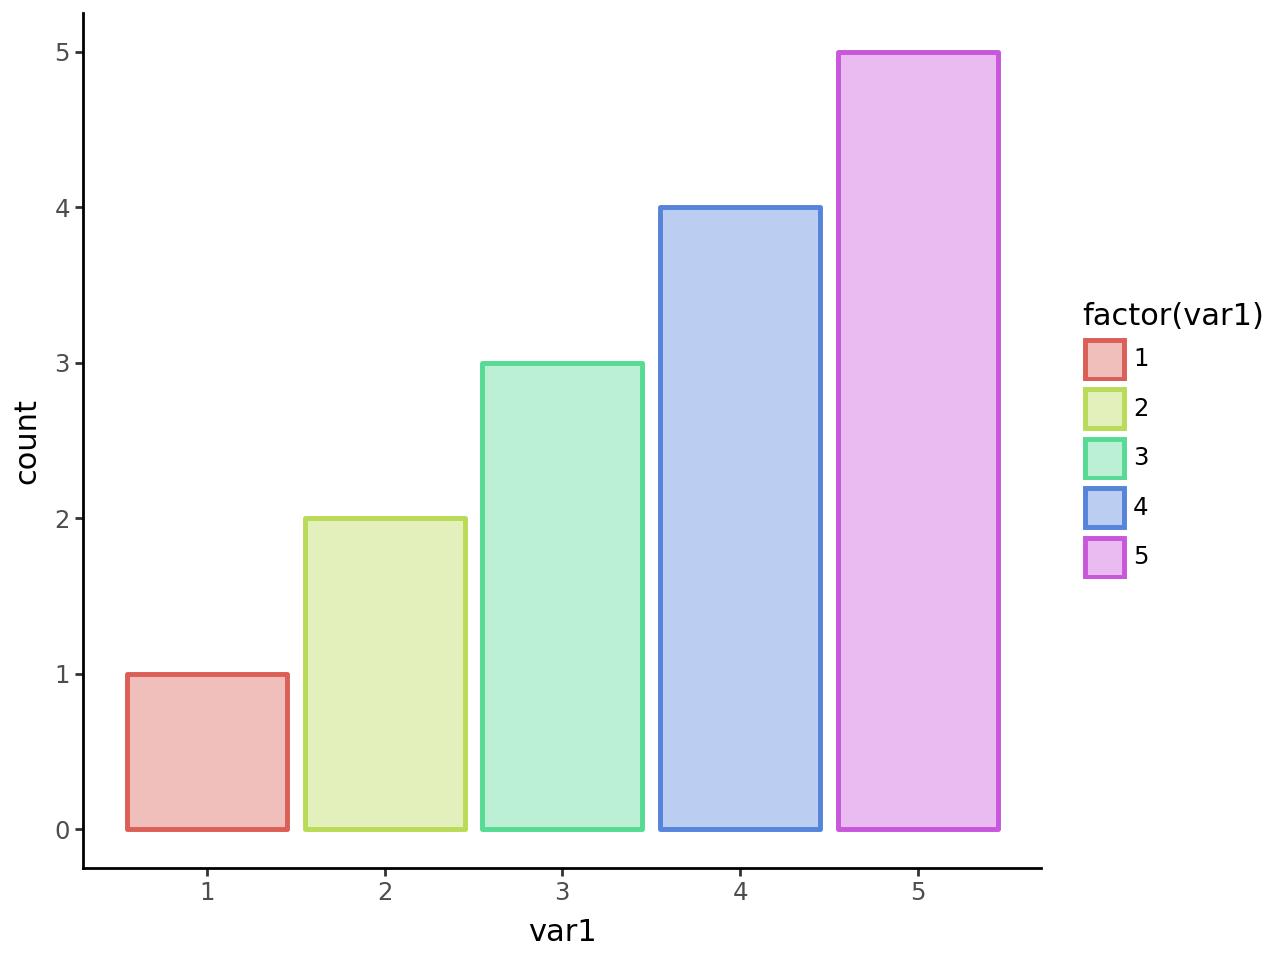

In [5]:
(
    ggplot(df, aes("var1", color="factor(var1)"))
    + geom_bar(aes(fill=after_scale('color + "66"')), size=1)
    + theme_classic()
)